In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
concrete_data = pd.read_csv("/home/vikram/Documents/S6/ML_LAB/2024_02_16/Iris.csv")
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [253]:
concrete_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica




1.   Model
    - w, b
    - train
    - gradient descent
    - derivaties
      - error
        - prediction

    - train test split


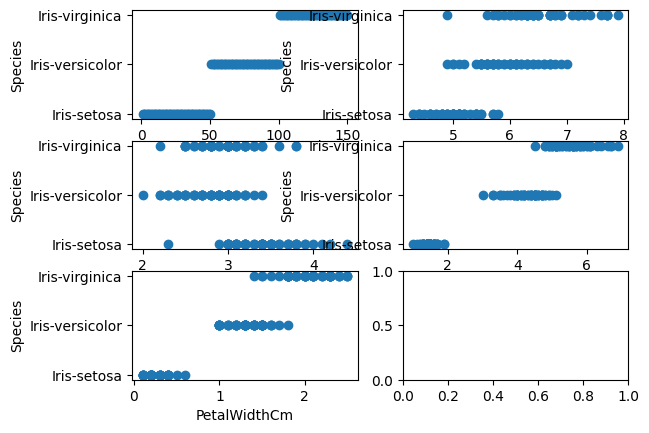

In [254]:
columns = concrete_data.columns

fig, ax = plt.subplots(3, 2)
for i in range(len(columns) - 1) :
  ax[i // 2, i % 2].scatter(concrete_data[columns[i]], concrete_data[columns[-1]])
  ax[i // 2, i % 2].set_xlabel(columns[i])
  ax[i // 2, i % 2].set_ylabel(columns[-1])
plt.show()

concrete_data.drop(columns[0], axis=1, inplace=True)

In [255]:
concrete_data.replace(
    to_replace={columns[-1] : {
            'Iris-virginica' : 1,
            'Iris-versicolor' : 0,
            'Iris-setosa' : 0
        }
    },
    inplace=True
)

import sklearn.model_selection as sklms

concrete_data = concrete_data.to_numpy()

x = concrete_data[:, :-1]
y = concrete_data[:, -1]
x_train, x_test, y_train, y_test = sklt.train_test_split(
    x, y,
    random_state = 100,
    test_size = 0.2
)

In [256]:
def sigmoid(z) :
    return (1 / (1 + np.exp(-z)))

In [257]:
def predict(x, w, b) :
    return sigmoid(np.dot(x, w) + b)

In [258]:
def gradient_descent(x, y, learning_rate, iterations) :
    cost = []

    m, n = x.shape
    # n x 1
    w = np.ones(n)
    b = 0.

    # dj_dw = 1 / m * sig {pred - true} * x_i
    for i in range(iterations) :

        dj_dw = (1 / m) * np.dot(
            # n x m
            x.T,
            # m x n * n x 1
            predict(x, w, b) - y
        )
        dj_db = (1 / m) * np.sum(
            predict(x, w, b) - y
        )

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

    return w, b

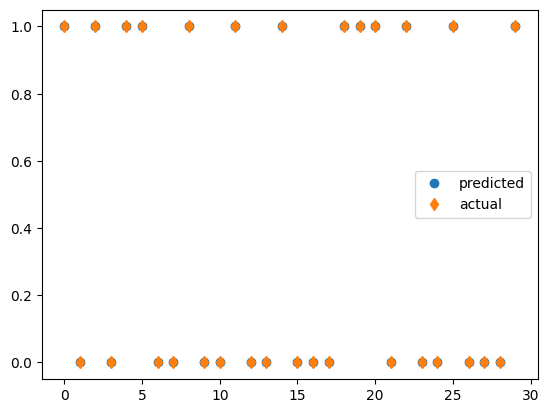

In [259]:
w, b = gradient_descent(x_train, y_train, 0.0001, 100000)

y_pred = predict(x_test, w, b)

y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

fig, ax = plt.subplots()
ax.plot(y_pred, 'o', label= "predicted")
ax.plot(y_test, 'd', label= "actual")
plt.legend()
plt.show()

In [262]:
import sklearn.metrics as sklm 
help(sklm.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=